### Importing Libraries

In [1]:
# Importing Libraries EDA Libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import metrics

# Libraries for Encoding
from sklearn.preprocessing import LabelEncoder
Encode = LabelEncoder()

# Libraries for Standardization
from sklearn.preprocessing import StandardScaler
Sc = StandardScaler()


# Libraries for Models
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble  import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor  
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model


# For model building
from  sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

# Grid Search Libraries
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


# Extra Libraries
from sklearn.preprocessing import Binarizer
from sklearn import preprocessing
from sklearn import neighbors
from math import sqrt

# Warning Libraries
import warnings
warnings.filterwarnings('ignore')
np.random.seed(27)

### Reading Dataset

In [2]:
train = pd.read_csv(r'D:\Downloads\Data Science\Analytics_Vidya\Dataset\Number of UpVotes\train.csv')
test = pd.read_csv(r'D:\Downloads\Data Science\Analytics_Vidya\Dataset\Number of UpVotes\test.csv')
ss = pd.read_csv(r'D:\Downloads\Data Science\Analytics_Vidya\Dataset\Number of UpVotes\ss.csv')

### Analysing Data

In [3]:
train.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0
3,96996,a,264.0,3.0,168793,27064.0,9.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0


In [4]:
test.head()

,ID,Tag,Reputation,Answers,Username,Views
0,366953,a,5645.0,3.0,50652,33200.0
1,71864,c,24511.0,6.0,37685,2730.0
2,141692,i,927.0,1.0,135293,21167.0
3,316833,i,21.0,6.0,166998,18528.0
4,440445,i,4475.0,10.0,53504,57240.0


In [5]:
ss.head()

,ID,Upvotes
0,7,500
1,9,500
2,12,500
3,13,500
4,16,500


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330045 entries, 0 to 330044
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ID          330045 non-null  int64  
 1   Tag         330045 non-null  object 
 2   Reputation  330045 non-null  float64
 3   Answers     330045 non-null  float64
 4   Username    330045 non-null  int64  
 5   Views       330045 non-null  float64
 6   Upvotes     330045 non-null  float64
dtypes: float64(4), int64(2), object(1)
memory usage: 17.6+ MB


In [7]:
train.isna().sum()

ID            0
Tag           0
Reputation    0
Answers       0
Username      0
Views         0
Upvotes       0
dtype: int64

In [8]:
train.shape

(330045, 7)

### Detecting Outliers

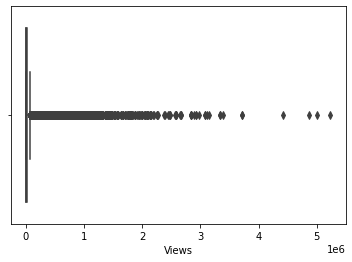

In [9]:
sns.boxplot(x = train['Views'])

In [10]:
(train[train['Views'] > 2950000]).count()

ID            14
Tag           14
Reputation    14
Answers       14
Username      14
Views         14
Upvotes       14
dtype: int64

In [11]:
train = train.drop(train[train.Views > 2950000].index)

In [12]:
train.shape

(330031, 7)

### Removing Useless Columns and Encoding Categorical Variable

In [13]:
train['Tag'] = Encode.fit_transform(train['Tag'])

In [14]:
train.drop(['ID','Username'], axis=1,inplace =True)

### Creating a Binary Transformation Column which means setting threshold value in Answers column ->If values are greater than 7 then 1 and if values are less than 7 then 0

In [15]:
train.head()

,Tag,Reputation,Answers,Views,Upvotes
0,0,3942.0,2.0,7855.0,42.0
1,0,26046.0,12.0,55801.0,1175.0
2,1,1358.0,4.0,8067.0,60.0
3,0,264.0,3.0,27064.0,9.0
4,1,4271.0,4.0,13986.0,83.0


In [16]:
BT = Binarizer(threshold = 7)
bn_trans = BT.transform([train['Answers']])[0]
train['Binary_Transformation'] = bn_trans
train['Binary_Transformation'] = train['Binary_Transformation'].astype(int)

In [17]:
train.head()

,Tag,Reputation,Answers,Views,Upvotes,Binary_Transformation
0,0,3942.0,2.0,7855.0,42.0,0
1,0,26046.0,12.0,55801.0,1175.0,1
2,1,1358.0,4.0,8067.0,60.0,0
3,0,264.0,3.0,27064.0,9.0,0
4,1,4271.0,4.0,13986.0,83.0,0


### Coorelation Graph

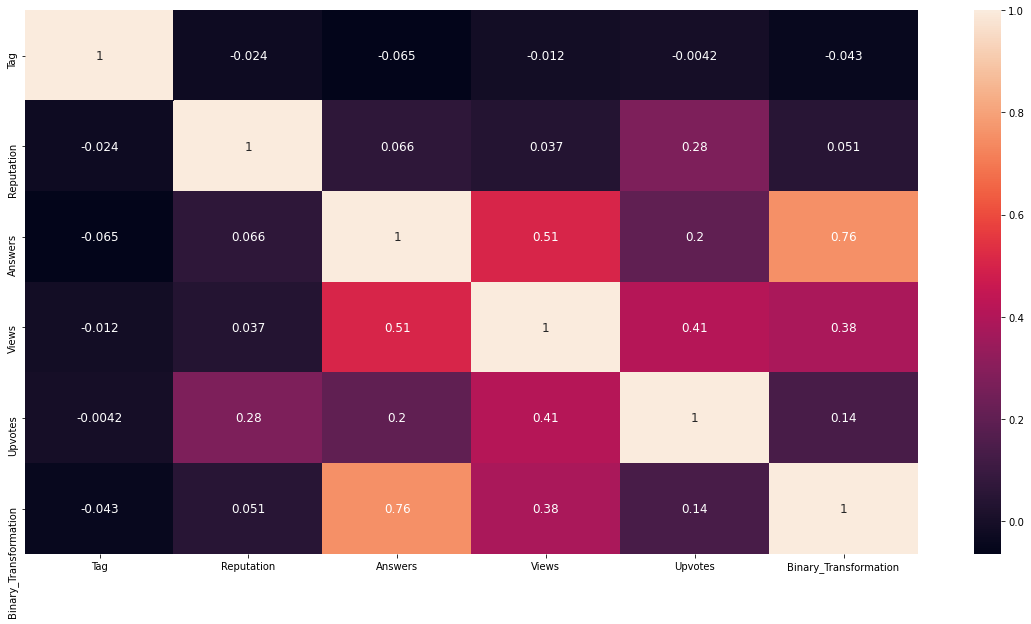

In [18]:
fig,ax=plt.subplots(figsize=(20,10))
sns.heatmap(train.corr(),annot=True,annot_kws={'size':12})

### Taking Input and Output Columns

In [19]:
train.columns

Index(['Tag', 'Reputation', 'Answers', 'Views', 'Upvotes',
       'Binary_Transformation'],
      dtype='object')

In [20]:
features = [x for x in train.columns if x not in ['Upvotes']]
features

['Tag', 'Reputation', 'Answers', 'Views', 'Binary_Transformation']

In [21]:
target_column = train['Upvotes']

### Splitting Data

In [22]:
x_train, x_test, y_train, y_test = train_test_split(train[features], target_column,test_size = 0.25,random_state =101)
x_train = Sc.fit_transform(x_train)
x_test = Sc.transform(x_test)
print(train.shape,x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(330031, 6) (247523, 5) (247523,) (82508, 5) (82508,)


### Modelling on Train Data

### Polynomial

In [23]:
poly_reg = PolynomialFeatures(degree = 5,interaction_only=False, include_bias=True)
X_poly = poly_reg.fit_transform(x_train)
poly_reg.fit(x_train, y_train)

PolynomialFeatures(degree=5)

In [24]:
lin_reg = linear_model.LassoLars(alpha = 0.021, copy_X = True, eps = 2.220446049250313e-16,
                                fit_intercept = True, fit_path = True, max_iter = 151, normalize = True,
                                positive = False, precompute = 'auto', verbose = False)

In [25]:
lin_reg.fit(X_poly, y_train)

LassoLars(alpha=0.021, max_iter=151)

In [26]:
preds = lin_reg.predict(poly_reg.fit_transform(x_test))
print(r2_score(y_test, preds))

0.9285413371213219


In [27]:
print('MAE:', metrics.mean_absolute_error(y_test, preds))

MAE: 105.53689951104273


### Decision Tree Regressor

In [ ]:
dtr = DecisionTreeRegressor(random_state = None,max_depth = 4, min_samples_leaf = 1)  
dtr.fit(x_train, y_train)
DTR_pred = dtr.predict(x_test)

In [ ]:
# Root mean squared error
rmse = sqrt(mean_squared_error(y_test,DTR_pred))
rmse

In [ ]:
# R2 Score
print(r2_score(y_test,DTR_pred)*100)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, DTR_pred))

### Random Forest Regressor

In [ ]:
rfr = RandomForestRegressor(n_estimators = 100,random_state = None,max_depth = 8)
rfr.fit(x_train,y_train)
RFR_pred = rfr.predict(x_test)

In [ ]:
# Root mean squared error
rmse = sqrt(mean_squared_error(y_test,RFR_pred))
rmse

In [ ]:
# R2 Score
print(r2_score(y_test,RFR_pred)*100)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, RFR_pred))

### KNN

In [ ]:
knn = neighbors.KNeighborsRegressor(n_neighbors = 6,
                                      weights  = 'uniform',
                                      algorithm = 'auto',
                                      leaf_size = 15,
                                      p = 2,
                                      metric = 'minkowski',
                                      metric_params = None,
                                      n_jobs = 1)
knn.fit(x_train, y_train) 
KNN_pred = knn.predict(x_test)

In [ ]:
# Root mean squared error
rmse = sqrt(mean_squared_error(y_test,KNN_pred))
rmse

In [ ]:
# R2 Score
print(r2_score(y_test,KNN_pred)*100)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, KNN_pred))

### Gradient Boosting

In [ ]:
gbr = GradientBoostingRegressor(loss='ls',
                                  learning_rate=0.1,
                                  n_estimators=100,
                                  subsample=1.0,
                                  criterion='friedman_mse',
                                  min_samples_split=2,
                                  min_samples_leaf=1,
                                  min_weight_fraction_leaf=0.0,
                                  max_depth=6,
                                  min_impurity_decrease=0.0,
                                  min_impurity_split=None,
                                  init=None,
                                  random_state=None,
                                  max_features=None,
                                  alpha=0.9,
                                  verbose=0,
                                  max_leaf_nodes=None,
                                  warm_start=False,
                                  presort='deprecated',
                                  validation_fraction=0.1,
                                  n_iter_no_change=None,
                                  tol=0.0001,
                                  ccp_alpha=0.0)
gbr.fit(x_train,y_train)
GBR_pred = gbr.predict(x_test)

In [ ]:
# Root mean squared error
rmse = sqrt(mean_squared_error(y_test,GBR_pred))
rmse

In [ ]:
# R2 Score
print(r2_score(y_test,GBR_pred)*100)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, GBR_pred))

### LGBM


In [ ]:
lgbm = LGBMRegressor(boosting_type='gbdt',
                   num_leaves=41,
                   max_depth= 5,
                   learning_rate=0.1,
                   n_estimators=300,
                   subsample_for_bin=200000,
                   objective=None,
                   class_weight=None,
                   min_split_gain=0.0,
                   min_child_weight=0.001,
                   min_child_samples=20,
                   subsample=1.0,
                   subsample_freq=0,
                   colsample_bytree=1.0,
                   reg_alpha=0.0,
                   reg_lambda=0.0,
                   random_state=None,
                   n_jobs=- 1,
                   silent=True,
                   importance_type='split')


In [ ]:
lgbm.fit(x_train,y_train)
LGBM_pred = lgbm.predict(x_test)

In [ ]:
# Root mean squared error
rmse = sqrt(mean_squared_error(y_test,LGBM_pred))
rmse

In [ ]:
# R2 Score
print(r2_score(y_test,LGBM_pred)*100)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, LGBM_pred))

### Modelling on Test Data

In [28]:
ids = test['ID']
test.drop(['ID','Username'], axis=1,inplace =True)
test['Tag'] = Encode.fit_transform(test['Tag'])

In [29]:
bn = Binarizer(threshold = 7)
bn_trans = bn.transform([test['Answers']])[0]
test['bn_trans'] = bn_trans

In [30]:
test = Sc.fit_transform(test)
pred_test = lin_reg.predict(poly_reg.fit_transform(test))
pred_test=abs(pred_test)
pred_test=pred_test.astype(int)

In [31]:
Final_submission = pd.DataFrame({'ID': ids,'Upvotes':pred_test})
#Final_submission['Upvotes'] = Final_submission['Upvotes'].astype(int)
Final_submission.to_csv(r'D:\Downloads\Data Science\Analytics_Vidya\Output\UpVotes Prediction\Poly1.csv',index=False)

### Decision Tree

In [ ]:
DTR_pred_test = dtr.predict(test)

In [ ]:
Final_submission = pd.DataFrame({'ID': ids,'Upvotes':DTR_pred_test})
Final_submission['Upvotes'] = Final_submission['Upvotes'].astype(int)
Final_submission.to_csv(r'D:\Downloads\Data Science\Analytics_Vidya\Output\UpVotes Prediction\DTR.csv',index=False)

### Gradient Boosting

In [ ]:
GBR_pred_test = gbr.predict(test)

In [ ]:
Final_submission = pd.DataFrame({'ID': ids,'Upvotes':GBR_pred_test})
Final_submission['Upvotes'] = Final_submission['Upvotes'].astype(int)
Final_submission.to_csv(r'D:\Downloads\Data Science\Analytics_Vidya\Output\UpVotes Prediction\GBR1.csv',index=False)

### Random Forest

In [ ]:
RFR_pred_test = rfr.predict(test)

In [ ]:
Final_submission = pd.DataFrame({'ID': ids,'Upvotes':RFR_pred_test})
Final_submission['Upvotes'] = Final_submission['Upvotes'].astype(int)
Final_submission.to_csv(r'D:\Downloads\Data Science\Analytics_Vidya\Output\UpVotes Prediction\RFR.csv',index=False)

### LGBM


In [ ]:
LGBM_pred_test = lgbm.predict(test)

In [ ]:
Final_submission = pd.DataFrame({'ID': ids,'Upvotes':LGBM_pred_test})
Final_submission['Upvotes'] = Final_submission['Upvotes'].astype(int)
Final_submission.to_csv(r'D:\Downloads\Data Science\Analytics_Vidya\Output\UpVotes Prediction\LGBM.csv',index=False)